<a href="https://colab.research.google.com/github/SaraKarim23/-Python-for-Extragalactic-Astronomy/blob/main/Handling_FITS_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is a **FITS File**?  

A **Flexible Image Transport System (FITS) file** is the standard format for storing astronomical data. It is designed to hold multi-dimensional arrays (such as images and spectra) along with metadata in a structured and portable way. You can find more details [here](https://en.wikipedia.org/wiki/FITS).

#### **Key Features:**  
- **Image and Data Storage:** FITS files store astronomical images, tables, and spectra, making them versatile for different types of data.  
- **Header and Data Structure:** Each FITS file consists of a **header** (containing metadata such as observation details and instrument settings) and **data** (storing pixel values, tables, or other numerical arrays).  
- **Multi-Extension Capability:** A FITS file can have multiple extensions, each containing different types of data, such as science images, weight maps, or calibration information.  

FITS files are essential for astronomical research, enabling precise data storage, analysis, and sharing across the scientific community.

[If you would like more detailed information, here is a helpful resource](https://docs.astropy.org/en/latest/io/fits/index.html)

### We'll use Astropy's fits module to open a FITS file.
- #### Installing `astropy` -
 `!pip install astropy` installs **Astropy**, a Python library for **astronomical data analysis**. It provides tools for **handling FITS files, coordinate transformations, time conversions, and astrophysical calculations**. The `!` is used in **Jupyter Notebooks** to run shell commands.

In [ ]:
!pip install astropy

[You can download the fits file used in this notebook from here](https://drive.google.com/file/d/14nQaNwoz1S2PkLY7A158NHsV21RVauxi/view?usp=sharing)

In [ ]:
from astropy.io import fits
hdulist = fits.open('sparkler_practice_fits_file.fits')

In [ ]:
hdulist.info()

Filename: sparkler_practice_fits_file.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (150, 150)   float32   


In [ ]:
primary_hdu = hdulist[0]
print(primary_hdu.header)  # Prints the header information

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  150                                                  NAXIS2  =                  150                                                  WCSAXES =                    2 / Number of coordinate axes                      CRPIX1  =                251.5 / Pixel coordinate of reference point            CRPIX2  =                167.5 / Pixel coordinate of reference point            PC1_1   = -1.1111111111111E-05 / Coordinate transformation matrix element       PC2_2   =  1.1111111111111E-05 / Coordinate transformation matrix element       CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  CUNIT1  = 'deg'                / Units o

In [ ]:
image_data = primary_hdu.data
print(image_data.shape)  # Shows the dimensions of the image array

(150, 150)


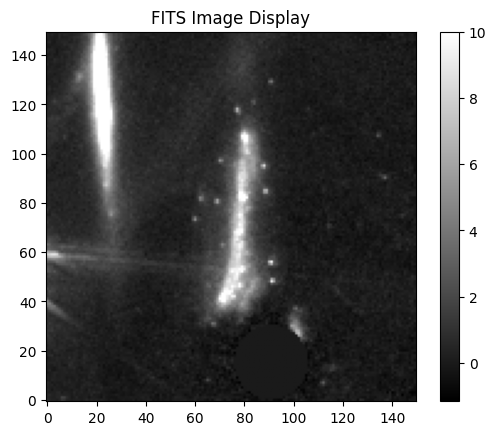

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image_data, cmap='gray', origin='lower', vmax=10)
plt.colorbar()
plt.title('FITS Image Display')
plt.show()

## Task 1
- ##### Write a Python script that opens a FITS file and checks if it contains multiple HDUs (Header Data Units). If the file has more than one HDU, extract and print the header of the second HDU.
- If the file contains only one HDU, the script should print nothing. Can you tell how many HDUs the given fits file has?

In [ ]:
hdulist = fits.open('sparkler_practice_fits_file.fits') # Open the FITS file

num_hdus = len(hdulist)
print(f"Number of HDUs: {num_hdus}") # Check the number of HDUs

# If there is more than one HDU, print the header of the second one
if num_hdus > 1:
    print("Header of the second HDU:")
    print(hdulist[1].header)

Number of HDUs: 1


**There’s only one HDU - typically just the Primary HDU - so there’s nothing further to extract.**

### Creating and Saving a New FITS File
- ##### We can create a new FITS file by generating dummy image data and saving it in a new FITS file.
- ##### The `overwrite=True` parameter ensures the file is replaced if it already exists.


In [ ]:
import numpy as np

new_data = np.random.random((100, 100))  # Create dummy data
hdu = fits.PrimaryHDU(new_data)  # Create a new FITS HDU
hdu.writeto('new_fits_file.fits', overwrite=True)  # Save the FITS file
print("FITS File has been saved!")

FITS File has been saved!


In [ ]:
hdulist.close() #Closing the FITS File

## Changing Coordinates (WCS to pixel)

Pixel Coordinates: (array(79.9999937), array(79.99961133))


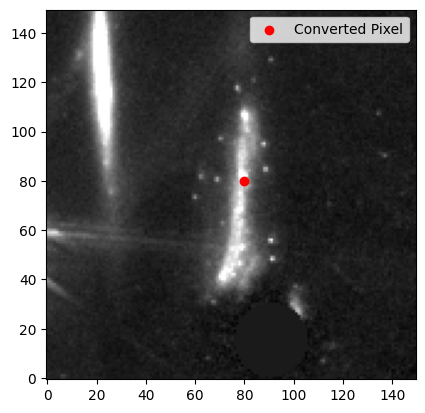

In [ ]:
# Import necessary modules
from astropy.wcs import WCS #WCS: Uses to handle the World Coordinate System (WCS) information from FITS headers.
from astropy.coordinates import SkyCoord #SkyCoord: A class from astropy.coordinates used to represent celestial coordinates
                                                    #like RA (Right Ascension) and Dec (Declination) in a coordinate system such as degrees.

# Load the FITS file
fits_file = 'sparkler_practice_fits_file.fits'
hdul = fits.open(fits_file)

# Extract the WCS information from the header
wcs = WCS(hdul[0].header) #Creates a WCS object using the header information, enabling the conversion between world and pixel coordinates.

# Define world coordinates (e.g., RA, Dec in degrees)
ra = 110.84068268  # Right Ascension in degrees
dec = -73.45525101 # Declination in degrees

# Convert RA, Dec to a SkyCoord object
sky_coord = SkyCoord(ra, dec, unit="deg") #Creates a SkyCoord object that holds the world coordinates (RA, Dec) in degrees.

# Convert world coordinates (SkyCoord) to pixel coordinates
pixel_coords = wcs.world_to_pixel(sky_coord) # Converts the world coordinates stored in the SkyCoord object into pixel coordinates (x, y) in the image, according to the WCS information stored in the FITS header.

# Print the result
print("Pixel Coordinates:", pixel_coords)

# Visualize if you like (optional)
plt.imshow(hdul[0].data, cmap='gray', origin='lower', vmax=10)
plt.scatter(pixel_coords[0], pixel_coords[0], color='red', label='Converted Pixel')
plt.legend()
plt.show()

## Changing Coordinates (pixel to wcs)

World Coordinates (RA, Dec): <SkyCoord (ICRS): (ra, dec) in deg
    (110.84263384, -73.45569538)>


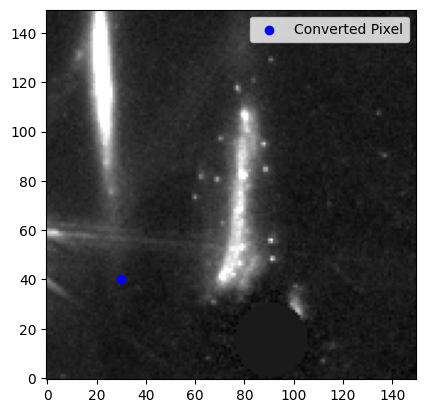

In [ ]:
# Import necessary modules
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the FITS file
fits_file = 'sparkler_practice_fits_file.fits'
hdul = fits.open(fits_file)

# Extract the WCS information from the header
wcs = WCS(hdul[0].header)

# Define pixel coordinates (e.g., x, y in pixels)
pixel_x = 30  # x pixel coordinate (You can use any x pixel value within the image)
pixel_y = 40  # y pixel coordinate (You can use any y pixel value within the image)

# Convert pixel coordinates to world coordinates (RA, Dec)
world_coords = wcs.pixel_to_world(pixel_x, pixel_y)
# Converts the provided pixel coordinates (pixel_x, pixel_y) into world coordinates (RA, Dec) using the WCS information from the FITS header.

# Print the result
print("World Coordinates (RA, Dec):", world_coords)

# Visualize if you like (optional)
plt.imshow(hdul[0].data, cmap='gray', origin='lower', vmax=10)
plt.scatter(pixel_x, pixel_y, color='blue', label='Converted Pixel')
plt.legend()
plt.show()

# Close the FITS file
hdul.close()

# Task 2
- ##### Write a Python script that takes a FITS file, extracts the WCS information from the header, and converts the image center's pixel coordinates to world coordinates (RA, Dec).

- ##### What do you think the pixel coordinates of the image center are? Then, you can use the pixel coordinates corresponding to the center of the image for the conversion.

In [ ]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt

# Load the FITS file
fits_file = 'sparkler_practice_fits_file.fits'
hdul = fits.open(fits_file)

# Extract image data and WCS
image_data = hdul[0].data
wcs = WCS(hdul[0].header)

# Get image shape and calculate center pixel coordinates
height, width = image_data.shape #FITS image has dimensions (150, 150)
center_x = width / 2
center_y = height / 2
print(f"Center Pixel Coordinates: ({center_x}, {center_y})")

Center Pixel Coordinates: (75.0, 75.0)


In [ ]:
# Convert center pixel to world coordinates (RA, Dec)
world_coords = wcs.pixel_to_world(center_x, center_y)
print("World Coordinates (RA, Dec) of image center:", world_coords)

World Coordinates (RA, Dec) of image center: <SkyCoord (ICRS): (ra, dec) in deg
    (110.8408778, -73.45530655)>


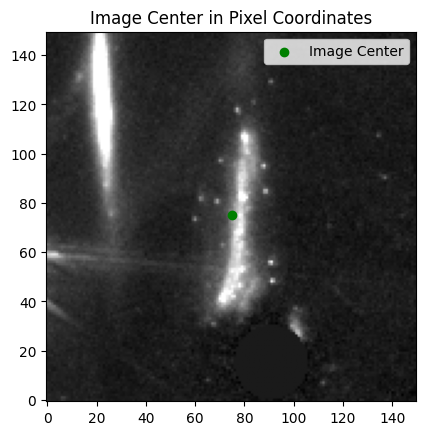

In [ ]:
#Visualize the image with center marked
plt.imshow(image_data, cmap='gray', origin='lower', vmax=10)
plt.scatter(center_x, center_y, color='green', label='Image Center')
plt.legend()
plt.title("Image Center in Pixel Coordinates")
plt.show()

# Close the FITS file
hdul.close()

## Making Cutout from a Larger Image

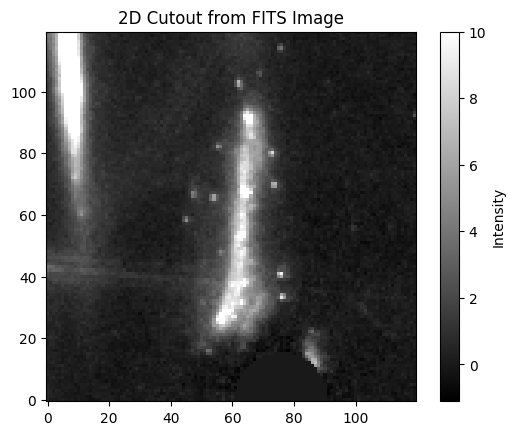

In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.nddata import Cutout2D

# Load the FITS file
fits_file = 'sparkler_practice_fits_file.fits'
hdul = fits.open(fits_file)

# Extract the image data and WCS information
image_data = hdul[0].data
wcs = WCS(hdul[0].header)

# Define the center of the cutout in pixel coordinates (x, y)
cutout_center_x = 75  # We generally use the x pixel coordinate of the center of the target object
cutout_center_y = 75  # We generally use the y pixel coordinate of the center of the target object

# Define the size of the cutout (in pixels)
cutout_size = 120  # Size of the cutout (120x120 pixels)
#This defines the size of the cutout in pixels. In this case, a 50x50 pixel region around the center is extracted.

# Create the 2D cutout using pixel coordinates
cutout = Cutout2D(image_data, position=(cutout_center_x, cutout_center_y), size=(cutout_size, cutout_size), wcs=wcs)
#Cutout2D: This function extracts a 2D cutout from the image data based on the center and size provided
#image_data: The 2D array of image data extracted from the FITS file.
#position=(cutout_center_x, cutout_center_y): The center of the cutout, specified in pixel coordinates.
#size=(cutout_size, cutout_size): The size of the cutout, specified in pixels (a square cutout of 50x50 pixels in this case).
#wcs=wcs: The WCS object, which is passed to ensure that the cutout retains WCS information. This is important if you later want to convert the pixel coordinates of the cutout back to world coordinates (RA/Dec).


# Access the cutout data
cutout_data = cutout.data
cutout_wcs = cutout.wcs  # Extract the WCS for the cutout

#cutout.data: This is the extracted image data from the cutout. It is a 2D numpy array representing the pixel values of the cutout.
#cutout.wcs: This is the WCS information for the cutout. Since the cutout retains the original WCS, you can use it to convert pixel coordinates within the cutout to world coordinates (RA/Dec).


# Visualize the cutout
plt.imshow(cutout_data, cmap='gray', origin='lower', vmax=10)
plt.title("2D Cutout from FITS Image")
plt.colorbar(label="Intensity")
plt.show()

# Close the FITS file
hdul.close()

# Task 3
- ##### Write a Python script that creates a 2D cutout from a FITS image, and saves the resulting cutout as a new FITS file. You can change center coordinates and size of the cutout according to your preference.

In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.nddata import Cutout2D

# Load the FITS file
fits_file = 'sparkler_practice_fits_file.fits'
hdul = fits.open(fits_file)

# Extract the image data and WCS information
image_data = hdul[0].data
wcs = WCS(hdul[0].header)

# Define the center and size of the cutout
cutout_center_x = 75   # x coordinate of center
cutout_center_y = 75   # y coordinate of center
cutout_size = 120      # cutout size (120x120)

# Create the cutout
cutout = Cutout2D(image_data, position=(cutout_center_x, cutout_center_y), size=(cutout_size, cutout_size), wcs=wcs)

# Extract cutout data and WCS
cutout_data = cutout.data
cutout_wcs = cutout.wcs

# Create a new PrimaryHDU object for the cutout
hdu = fits.PrimaryHDU(data=cutout_data, header=cutout_wcs.to_header())

# Write to a new FITS file
output_file = 'cutout_image.fits'
hdu.writeto(output_file, overwrite=True)
print(f"Cutout saved to {output_file}")


Cutout saved to cutout_image.fits


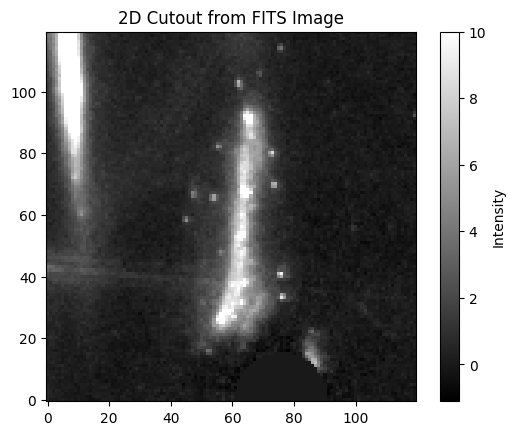

In [ ]:
#Show the cutout
plt.imshow(cutout_data, cmap='gray', origin='lower', vmax=10)
plt.title("2D Cutout from FITS Image")
plt.colorbar(label="Intensity")
plt.show()

# Close the original FITS file
hdul.close()

In [ ]:
# Save the cutout as a PNG image
plt.imsave('cutout_image.png', cutout_data, cmap='gray', origin='lower', vmax=10)
print("Cutout image saved as cutout_image.png")


Cutout image saved as cutout_image.png


- ##### plt.imsave() saves the image just like plt.imshow() would display it.

- ##### You can change 'cutout_image.png' to 'cutout_image.jpg' if you want a JPG file instead.

- ##### vmax=10 controls brightness contrast — adjust if your cutout looks too dark or too bright.
- ##### The cmap='gray' ensures it's in grayscale. You can change this to other colormaps like 'viridis', 'plasma', etc., if you want something more vibrant.